In [2]:
import cdsapi
import climetlab as cml
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import geopy
import xarray as xr
import pandas as pd

import csv
import os
import pickle

import seaborn as sns

In [3]:
with open("entry_table.dat", "rb") as f:
    final_table = pickle.load(f)

In [36]:
for i in final_table:
    if 'Georgia' in str(i['Location'].address):
        print(i)
        file_name = i['Month'] + '-' + i['Day'] + '-' + i['Year'] + '.nc'
        x = xr.open_dataset('../datafiles/' + file_name)
        currLocation = i['Location']
        print(x)
        lat = []
        lon = []
        for j in range(100):
            diff_lat = (j - 1) * 0.25
            for k in range(100):
                diff_lon = (k - 1) * 0.25
                lat.append(currLocation.geometry.y.values[0] + diff_lat)
                lon.append(currLocation.geometry.x.values[0]+360 + diff_lon)

        locate =  x.sel(latitude=lat, longitude=lon, method="nearest") - 273
        print(locate.sf.to_numpy())
        print(locate.u10.to_numpy())
        print(locate.v10.to_numpy())
        wind_ave = np.sqrt(np.square(locate.u10.to_numpy())+np.square(locate.v10.to_numpy()))
        print(wind_ave)
        break


{'Location':                      geometry                 address
0  POINT (-83.11374 32.32938)  Georgia, United States, 'Day': '03', 'Month': '01', 'Year': '2022', 'ID': 1}
<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 8)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2022-01-03 ... 2022-01-03T21:00:00
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    sf         (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-01-25 05:54:30 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...
[[[-273.      -273.      -273.      ... -2

In [37]:
snow = locate.sf.to_numpy()
print(snow.shape)
print(wind_ave.shape)

(8, 10000, 10000)
(8, 10000, 10000)


In [38]:
sf1d = snow.ravel()
print(sf1d)
w1d = wind_ave.ravel()
print(w1d)

[-273.      -273.      -273.      ... -272.9999  -272.99994 -272.99994]
[380.45193 380.3798  380.1629  ... 384.6181  385.16275 385.84152]


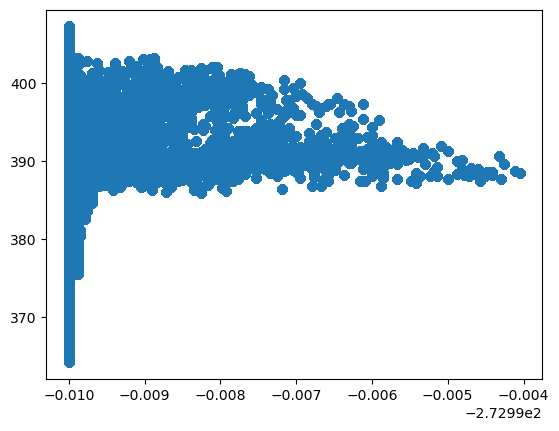

In [39]:
plt.scatter(sf1d,w1d)
plt.show()